<a href="https://colab.research.google.com/github/Gaukhar-ai/Gaukhar.Diamond.github/blob/master/NLP_natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
#nltk.download()

In [2]:
#dir(nltk)

In [3]:

nltk.download("stopwords")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#what can i do with nltk?

from nltk.corpus import stopwords
stopwords.words('english')[0:5]

['i', 'me', 'my', 'myself', 'we']

In [5]:
#let's look at additional words later in the list
stopwords.words('english')[0:500:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

NLP Basics: reading in text data.
Read in Semi-structured text data.

In [6]:
#read in and view the raw data
import pandas as pd
messages = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/NLP/main/spam.csv', encoding = "latin-1") #other encoding = "cp1252"
#encoding = "ISO-8859-1", 'utf-8'
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
messages= messages.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1) #axis 1 = columns, 1 = rows
messages.columns = ['label', 'text']
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#how big is the dataset?
messages.shape

(5572, 2)

In [9]:
#what portion of our text messages are actually spam?
messages['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
#are we missing any data?
print('Number of nulls in label: {}'.format(messages['label'].isnull().sum()))
print('Number of nulls in text: {}'.format(messages['text'].isnull().sum()))

Number of nulls in label: 0
Number of nulls in text: 0


NLP Basics: Implementing A pipeline to clean Text
Pre-processing Text Data
Cleaning up the text data is necessary to highlight attributes that I'm going to want my ML system to pick up on. We will explore 3 pre=processing steps in this lesson:

1. remove punctuation
2. tokenization
3. remove stopwords

In [11]:
#read in raw data and clean up the column names:
import pandas as pd
pd.set_option('display.max_colwidth', 100) #with display can see more data

messages = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/NLP/main/spam.csv', encoding = "latin-1")
messages = messages.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
messages.columns = ['label', 'text']
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


REMOVE PUNCTUATION

In [12]:
#what punctuation is included in the default list?
import string #string package has punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
#why is it important to remove punctuation? cuz . , look like characters
'This messages is spam' == 'This message is spam.'


False

In [14]:
#define a function to remove punctuation in our messages

def remove_punct(text):
  text = ''.join([char for char in text if char not in string.punctuation]) #'' join on nothing.
  return text

messages['text_clean'] = messages['text'].apply(lambda x: remove_punct(x)) #lambda to apply that function
messages.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


TOKENIZE

In [15]:
#define a function to split our sentences into a list of words
import re #re package

def tokenize(text):
  tokens = re.split('\W+', text) #'\W+'= this is the pattern, splits white space, special characters, etc., re = regex pattern to split
  return tokens

messages['text_tokenized'] = messages['text_clean'].apply(lambda x: tokenize(x.lower()))
messages.head()

,label,text,text_clean,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


REMOVE STOPWORDS

In [16]:
#what an example look like?

tokenize('I am learning NLP'.lower())


['i', 'am', 'learning', 'nlp']

In [17]:
#load the list of stopwords built into nltk
import nltk

stopwords = nltk.corpus.stopwords.words('english') 
#stopwords: the, but, a, i, am, etc.

In [18]:
#Define a function to remove all stopwords
def remove_stopwords(tokenized_text):
  text = [word for word in tokenized_text if word not in stopwords]
  return text

messages['text_nostop'] = messages['text_tokenized'].apply(lambda x: remove_stopwords(x))
messages.head()

,label,text,text_clean,text_tokenized,text_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


In [19]:
#remove stopwords in our example
remove_stopwords(tokenize('I am learning NLP'.lower()))

['learning', 'nlp']

This above was a pre-processing process

Term frequency - inverse document Frequency (TF-IDF)
-creates a document-term matrix; one row per document, one column per word in the corpus
 - generates a weighting for each word/document pair intended to reflect how important a given word is to the doc within the context of its frequency withing a larger corpus.

W(ij) = TF(ij)*log(N/DF(i))
W(ij) = weighted of word i for doc j
TF(ij) = number of times i occurs in j divided by the total number of terms in j
DF(i) = number of docs containing word i
N = total # of docs

I LIKE NLP.

TF(i), I like NLP = 1/3 ===== log(N/DFi) = log(5572/2690) = 0.32

TF(like), I like NLP = 1/3 ===== log(N/DF(like)) = log(5572/922) = 0.78

TF(nlp), I like NLP = 1/3 ===== log(N/DF(nlp)) = log(5572/1) = 3,75

now lets see the weight of each word:

W(i), i like nlp = 1/3* 0.32=0.11
W(like) i like nlp = 1/3*0.78 = 0.26
W(nlp) i like nlp = 1/3* 3.75 = 1.25


CREATE Function to Clean Text 

In [20]:
#define a function to handle all data cleaning
def clean_text(text):
  text = ''.join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [word for word in tokens if word not in stopwords]
  return text

Apply TFIDFVectorizer

In [21]:
#fit a basic TFIDF Vectorizer and view the results
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(messages['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5572, 9395)
['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p

In [22]:
#how is the output of the TfidfVectorizer stored?
#sparse matrix 
X_tfidf

<5572x9395 sparse matrix of type '<class 'numpy.float64'>'
	with 50453 stored elements in Compressed Sparse Row format>

NLP Basics: Building a Basic Random Forest Model on Top of Vectorized Text

Read In and Clean Text

In [23]:
#read in, clean, vectorize data
import nltk
import pandas as pd
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')

messages = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/NLP/main/spam.csv', encoding = "latin-1")
messages = messages.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
messages.columns = ['label', 'text']

def clean_text(text):
  text = ''.join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [word for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(messages['text'])

X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9355,9356,9357,9358,9359,9360,9361,9362,9363,9364,9365,9366,9367,9368,9369,9370,9371,9372,9373,9374,9375,9376,9377,9378,9379,9380,9381,9382,9383,9384,9385,9386,9387,9388,9389,9390,9391,9392,9393,9394
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Explore RandomForestClassifier Attributes & Hyperparams

In [24]:
#import RF for classification from sklearn
from sklearn.ensemble import RandomForestClassifier

In [25]:
#View the arguments (and default values) for RandomForestClassifier
print(RandomForestClassifier())
#these are hyperparams: max_depth=None, and n_estimators = 100(100 decision trees, then vote to determine the final predictions)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Explore RandomForestClassifier on a Holdout Set

In [26]:
#import the methods that will be needed to evaluate a basic model
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

In [27]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, messages['label'], test_size=0.2)

In [28]:
#fit a basic Random Forest model
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [29]:
#make predictions on the test set using the fit model
y_pred = rf_model.predict(X_test)

In [30]:
#evaluate model predictions using precision and recall
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
print('Precision: {} / Recall: {}'.format(round(precision, 3), round(recall, 3)))

Precision: 0.991 / Recall: 0.779


In [31]:
#100% precision = identified spam 100%
# recall 0.824 = all the spam that came into email, 82% were properly placed in the spam folder but other 17% got in the email box

1. hows NLP useful in the real world?
through spam filters, autocomplete, autocorrect

2. A basic random forest model needs to be fit on top of the cleaned data. Hows this done?
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

3. Your system calls for the vectorizing of a filed named text, and applying the results to a doc matrix. What are the steps to do this?
from sklearn.feature_extraction


word2vec = is a shallow, two-layer neural network that accepts a text corpus as an input, and it returns a set of vectors(also known as embeddings); each vector is a numeric representation of a given word. 
Numeric vector representation. Converts words into vectors. 


word2vec: How to implement word2vec
Explore Pre-trained Embeddings
some other options:
1. glove-twitter-{25/50/100/200}
2. glove-wiki-gigaword-{50/200/300}
3. word2vec-google-news-300
4. word2vec-ruscorpora-news-300

In [32]:
#Install gensim
#!pip install -U gensim #-U = just upgrade it

In [33]:
#Load pretrained word vectors using gensim
import gensim.downloader as api

wiki_embeddings = api.load('glove-wiki-gigaword-100')

In [34]:
#explore the word vector for 'king'
wiki_embeddings['king']

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [35]:
#Find the words most similar to king based on the trained 
wiki_embeddings.most_similar('king')

[('prince', 0.7682329416275024),
 ('queen', 0.7507690191268921),
 ('son', 0.7020887136459351),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919990181922913),
 ('kingdom', 0.6811410188674927),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712857484817505),
 ('ii', 0.6676074266433716)]

Train the Model

In [36]:
#read in the data and clean up column names
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/NLP/main/spam.csv', encoding = "latin-1")
messages = messages.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
messages.columns = ['label', 'text']
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [37]:
#clean data using the built in cleaner in gensim
messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))
messages.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, until, jurong, point, crazy, available, only, in, bugis, great, world, la, buffet, cine, th..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, in, wkly, comp, to, win, fa, cup, final, tkts, st, may, text, fa, to, to, receive,..."
3,ham,U dun say so early hor... U c already then say...,"[dun, say, so, early, hor, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, don, think, he, goes, to, usf, he, lives, around, here, though]"


In [38]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'],
                                                    messages['label'], test_size=0.2)

In [39]:
#train the word2vec model
w2v_model = gensim.models.Word2Vec(X_train, size=100, window=5, min_count=2)

In [40]:
#Explore the word vector for 'king' base on our trained model
w2v_model.wv['king']

array([ 0.01978393, -0.04682484,  0.02966967, -0.02899294, -0.03426671,
       -0.04412836,  0.1026277 , -0.07094911,  0.16332798,  0.01630904,
       -0.02939031, -0.03380548,  0.02213446,  0.03322219,  0.09148256,
       -0.03470774, -0.01000167,  0.00735548,  0.034507  ,  0.04807547,
        0.03986963,  0.04675548, -0.06715267,  0.03041052, -0.01958204,
       -0.03595275, -0.01431549,  0.06267456,  0.04202754,  0.05915687,
        0.05618982,  0.02428178,  0.01608057,  0.00686077,  0.01387505,
       -0.07223874,  0.01306203, -0.01176272,  0.07471342, -0.05806372,
       -0.04357803,  0.00808904,  0.0293536 ,  0.0207687 ,  0.03619374,
        0.00757255,  0.04784885,  0.04559695,  0.02116661, -0.01094947,
        0.10102256, -0.08487003, -0.03481343,  0.02287957, -0.05427445,
        0.05887509,  0.01208308,  0.08288814, -0.02632129,  0.05499083,
        0.01646038, -0.11662984,  0.01763981,  0.02261491, -0.08745168,
        0.0005695 , -0.03702389, -0.01856428, -0.02889081,  0.00

In [41]:
#Find the most similar words to 'king' based on word vectors from our trained model
w2v_model.wv.most_similar('king')

[('money', 0.9980133175849915),
 ('night', 0.9980027079582214),
 ('im', 0.997965931892395),
 ('offer', 0.9979655742645264),
 ('enjoy', 0.9979619979858398),
 ('www', 0.9979618787765503),
 ('him', 0.9979568719863892),
 ('xmas', 0.9979402422904968),
 ('just', 0.9979395270347595),
 ('best', 0.9979372620582581)]

Prep Word Vectors

In [42]:
#Generate a list of words the word2vec model learned word vectors for 
w2v_model.wv.index2word 
#appeared twice in the training data

['you',
 'to',
 'the',
 'and',
 'in',
 'is',
 'me',
 'my',
 'it',
 'for',
 'your',
 'of',
 'call',
 'have',
 'that',
 'on',
 'are',
 'now',
 'can',
 'so',
 'not',
 'but',
 'or',
 'we',
 'at',
 'do',
 'with',
 'if',
 'no',
 'ur',
 'get',
 'will',
 'just',
 'be',
 'this',
 'gt',
 'lt',
 'up',
 'how',
 'free',
 'when',
 'go',
 'from',
 'what',
 'll',
 'out',
 'all',
 'ok',
 'good',
 'am',
 'know',
 'like',
 'then',
 'got',
 'day',
 'was',
 'there',
 'come',
 'he',
 'its',
 'time',
 'text',
 'only',
 'want',
 'love',
 'send',
 'txt',
 'as',
 'one',
 'going',
 'home',
 'by',
 'stop',
 'see',
 'lor',
 'need',
 'she',
 'sorry',
 'still',
 'today',
 'about',
 'back',
 'don',
 'da',
 'dont',
 'hi',
 'mobile',
 'new',
 'reply',
 'they',
 'tell',
 'our',
 'any',
 'week',
 'been',
 'please',
 'take',
 'her',
 'later',
 'well',
 'think',
 'phone',
 'did',
 'pls',
 'some',
 'dear',
 're',
 'an',
 'hope',
 'ì_',
 'has',
 'hey',
 'here',
 'more',
 'much',
 'who',
 'oh',
 'claim',
 'great',
 'where',
 

In [43]:
#Generate aggregated sentence vectors based on the word vectors for each word in the sentence
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index2word]) for ls in X_test])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [44]:
#Why is the length of the sentence different than the lenght of the sentence vector?
for i, v in enumerate(w2v_vect):
  print(len(X_test.iloc[i]), len(v))
#looking for differences
#first number is a number of words in a text message. 
#the second number is a number of word vectors
#the model wants to see the same numbers on both sides

4 4
11 10
7 7
6 6
6 5
6 6
37 34
4 4
7 7
20 18
23 18
10 10
8 8
9 1
25 23
7 7
13 13
17 13
35 29
8 7
26 24
10 8
9 9
15 15
4 4
47 39
7 7
5 4
1 1
22 22
5 5
4 4
15 13
30 30
21 21
23 22
10 10
7 7
10 10
5 5
23 22
1 1
10 3
6 4
4 4
22 19
19 14
15 15
22 21
25 24
13 12
16 15
16 16
51 46
14 14
18 16
13 12
5 4
3 3
15 14
4 4
17 16
23 21
5 4
11 9
9 9
17 15
12 10
18 15
6 6
7 6
6 5
6 6
25 24
36 31
1 1
26 24
4 4
9 9
22 17
23 21
8 8
5 4
14 11
11 10
8 8
19 19
25 25
8 8
29 27
14 13
6 5
24 24
24 24
4 4
8 6
6 6
5 5
3 3
6 5
31 29
18 17
24 24
8 7
18 18
29 29
25 23
27 21
25 25
43 41
5 5
11 11
10 8
6 6
26 25
14 14
9 9
21 19
25 23
1 1
24 22
5 4
13 13
11 9
25 24
8 7
23 23
10 10
16 12
9 5
16 15
20 18
6 5
12 12
8 8
6 5
9 8
5 4
19 15
20 13
9 9
30 28
8 8
4 4
11 7
5 5
14 12
30 30
10 10
4 4
8 6
9 8
18 17
17 16
17 15
15 14
29 26
9 9
15 11
9 9
26 14
6 6
12 10
4 2
4 2
10 10
6 6
4 1
26 24
15 15
7 7
23 21
25 21
32 32
9 9
15 12
1 1
6 6
9 8
9 8
8 6
18 14
15 15
4 4
32 31
11 10
17 13
4 4
20 20
5 4
17 16
9 9
30 29
7 6
26 24
10 9
6

In [45]:
#Compute sentence vectors by averaging the word vectors for the words contained in the sentence
w2v_vect_avg = []

for vect in w2v_vect:
  if len(vect)!=0:
    w2v_vect_avg.append(vect.mean(axis=0))
  else:
    w2v_vect_avg.append(np.zeros(100))

In [46]:
#Are our sentence vector lenghts consistent?
for i, v in enumerate(w2v_vect_avg):
  print(len(X_test.iloc[i]), len(v))
#now ML will have 100 features for every word

4 100
11 100
7 100
6 100
6 100
6 100
37 100
4 100
7 100
20 100
23 100
10 100
8 100
9 100
25 100
7 100
13 100
17 100
35 100
8 100
26 100
10 100
9 100
15 100
4 100
47 100
7 100
5 100
1 100
22 100
5 100
4 100
15 100
30 100
21 100
23 100
10 100
7 100
10 100
5 100
23 100
1 100
10 100
6 100
4 100
22 100
19 100
15 100
22 100
25 100
13 100
16 100
16 100
51 100
14 100
18 100
13 100
5 100
3 100
15 100
4 100
17 100
23 100
5 100
11 100
9 100
17 100
12 100
18 100
6 100
7 100
6 100
6 100
25 100
36 100
1 100
26 100
4 100
9 100
22 100
23 100
8 100
5 100
14 100
11 100
8 100
19 100
25 100
8 100
29 100
14 100
6 100
24 100
24 100
4 100
8 100
6 100
5 100
3 100
6 100
31 100
18 100
24 100
8 100
18 100
29 100
25 100
27 100
25 100
43 100
5 100
11 100
10 100
6 100
26 100
14 100
9 100
21 100
25 100
1 100
24 100
5 100
13 100
11 100
25 100
8 100
23 100
10 100
16 100
9 100
16 100
20 100
6 100
12 100
8 100
6 100
9 100
5 100
19 100
20 100
9 100
30 100
8 100
4 100
11 100
5 100
14 100
30 100
10 100
4 100
8 100
9 100
18

Question 1 of 4
While prepping words for output, you need to generate aggregate sentences based on word vectors. How is this done in Python? 

You are correct!
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index2word])
   for ls in X_test])



You want to implement the pretrained word vectors from Wikipedia. How do you load them into the system? 

You are correct!
import gensim.downloader as api
wiki_embeddings = api.load('glove-wiki-gigaword-100')

What formula represents the similarity between a king and queen vector?
You are correct!

Sim(King, Queen) = cos(O)

The word2vec function is a powerful tool to help in analysis. What does it return?
You are correct!

a vector of numeric values

doc2vec

```
# This is formatted as code
```



In [47]:
#read in data, clean it, split into train test sets
import gensim
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/NLP/main/spam.csv', encoding = "latin-1") #other encoding = "cp1252"
messages = messages.drop(labels=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
messages.columns = ['label', 'text']
messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))
X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'], messages['label'], test_size=0.2)

In [48]:
#create tagged doc object to prepare to train the model
tagged_docs = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train)]

In [49]:
#look at what a tagged doc looks like:
tagged_docs[0]

TaggedDocument(words=['yunny', 'walking', 'in', 'citylink', 'now', 'ì_', 'faster', 'come', 'down', 'me', 'very', 'hungry'], tags=[0])

In [50]:
#train a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs, vector_size=100, window=5, min_count=2)

In [51]:
#what happens if we pass in a single word like we did for word2vec?
d2v_model.infer_vector('text')

array([ 1.20211777e-03, -1.69159472e-03, -5.83929708e-04,  4.41921037e-03,
       -4.87045106e-03,  3.50501481e-03, -1.87481975e-03, -4.51488700e-03,
       -3.06568312e-04, -3.84680764e-03,  2.48362892e-03, -1.27631961e-03,
       -1.96077814e-03, -4.40766657e-04, -4.48417990e-03,  1.52976450e-03,
        4.00405331e-03, -4.88099456e-03,  3.93445184e-03,  1.28785777e-03,
       -7.10429624e-04,  4.21142206e-03,  1.85193436e-03,  3.22874519e-03,
        6.39994629e-04, -1.76665222e-03,  2.90130374e-05, -4.84781805e-03,
       -5.73650235e-04, -1.29106489e-03,  4.74891486e-03, -1.82775548e-03,
        2.63781846e-03,  4.22488898e-03, -2.46105064e-03,  4.32548951e-03,
       -2.31251190e-03,  1.10092056e-04, -3.41111515e-03, -4.23869537e-03,
       -1.65234902e-03, -9.85562801e-04, -4.52554086e-03, -4.49050823e-03,
        2.59498018e-03, -2.58318870e-03,  1.12249004e-03,  8.56386090e-04,
       -4.27937601e-03, -4.51150257e-03,  2.72332085e-03,  3.84492497e-03,
        2.09674006e-03, -

In [52]:
#what happends if we pass in a list of words?
d2v_model.infer_vector(['i', 'am', 'learning', 'nlp'])

array([ 0.01130553, -0.00896192,  0.00401691,  0.00055079, -0.0035163 ,
       -0.01108337,  0.0089397 , -0.01423369,  0.02676815,  0.00331523,
       -0.00155852,  0.00145542, -0.00141381,  0.00809104,  0.02331535,
       -0.00091762,  0.00306977,  0.00035563,  0.00958218,  0.00467421,
        0.00757413,  0.00805726, -0.00743027,  0.00578521,  0.00307882,
       -0.00610205, -0.00118963,  0.01055309, -0.00351851,  0.01571778,
        0.01021047,  0.00139255,  0.00249988, -0.00149214,  0.00311027,
       -0.00879316,  0.00137726, -0.00065125,  0.00889308, -0.00904885,
       -0.00792648, -0.00068281,  0.01011311,  0.00311145,  0.00815364,
        0.00303034,  0.01053572,  0.0097432 ,  0.0038431 , -0.0045068 ,
        0.01676131, -0.01177255, -0.0036781 ,  0.00300192, -0.01170289,
        0.00928267, -0.00302884,  0.00629046, -0.00383263,  0.00846111,
        0.01088944, -0.01832097,  0.00113866,  0.0084969 , -0.01015259,
       -0.00389328, -0.00427887, -0.0018389 , -0.00939415, -0.00

What about pre_trained doc vectors?
there're not so many option sas there're for word vectors. There also is not an easy API to read these in like there's for word2vec so its more time consuming. 
Pre-trained vectors from trainin gon Wiki and Assiciated Press News can be found. 

Neural Network - pattern matching through the connection of many very simple functions to create one very powerful function, very loosely based on connected neurons in the brain.

In [53]:
#what a doc vector look like again?
d2v_model.infer_vector(['convert', 'words', 'to', 'vectors'])

array([ 3.50629585e-03, -4.66557569e-04,  5.27801551e-03, -2.82797101e-03,
        2.93436489e-04, -7.30997091e-03,  9.62548982e-03, -6.63489429e-03,
        2.24123280e-02,  6.17563771e-03,  1.61654188e-03, -3.98184452e-03,
        6.98634330e-03,  3.42019089e-03,  1.56703703e-02, -3.37492232e-03,
        1.51989958e-03,  1.86937093e-03,  5.63929090e-03,  1.02115385e-02,
        2.79820291e-03,  4.84242977e-04, -4.59825108e-03,  3.75443953e-03,
       -1.60580734e-03, -4.49978281e-03,  5.01020346e-03,  5.91223873e-03,
        4.67671547e-03,  1.07402410e-02,  1.14396438e-02,  4.85641696e-03,
        8.48702528e-03, -2.08804966e-03,  2.18833261e-03, -1.18772080e-02,
        3.33028100e-03, -3.16793867e-03,  9.38291475e-03, -5.85922925e-03,
       -9.60289128e-03, -5.53412247e-05,  8.66954401e-03,  4.24721045e-03,
        9.39439423e-03,  1.39038533e-03,  3.49473674e-03,  4.80894651e-03,
        6.28667476e-04, -4.35362430e-03,  1.37325227e-02, -1.25058051e-02,
       -4.69844905e-04,  

In [54]:
#how do we prepare these vectors to be used in a ML model?
vectors = [[d2v_model.infer_vector(words)] for words in X_test]

In [55]:
vectors[0]

[array([ 0.01681451, -0.0170963 ,  0.02204159, -0.01188507, -0.00221273,
        -0.02599878,  0.03287281, -0.02618768,  0.064459  ,  0.00987993,
        -0.01350656, -0.0053916 ,  0.00823971,  0.00682867,  0.04684161,
        -0.00019045, -0.00450049,  0.00746681,  0.02390821,  0.01662361,
         0.01345473,  0.00934295, -0.02138954,  0.02249516,  0.00154917,
        -0.02779537,  0.0034669 ,  0.02253057,  0.00199084,  0.02731936,
         0.02637012,  0.01741683,  0.01182489, -0.00911492,  0.01026451,
        -0.02326936,  0.01112181,  0.00248647,  0.03183715, -0.01861495,
        -0.02143073,  0.00644456,  0.01407192,  0.00147948,  0.02124048,
         0.00219425,  0.01472593,  0.01972063,  0.00508699, -0.00709613,
         0.03772699, -0.02506035,  0.00171784,  0.01492651, -0.01992087,
         0.01258257, -0.01105003,  0.01867906, -0.0042397 ,  0.03381157,
         0.01846858, -0.03826717,  0.00844192,  0.01588894, -0.02139486,
        -0.00524499, -0.01820862, -0.0081245 , -0.0

You just created a data model, and now you need to use list comprehension to test it against the data. How will you prepare these vectors to use in a machine learning model through code? 

vectors = [[d2v_model.infer_vector(words)] for words in X_test]

You have just read in your data, and now you need to create a tagged document to prepare the model. Which code snippet will do this? 

You are correct!

tagged_docs = [v, i for i, v in enumerate(X_train)]

Why is the doc2vec function more powerful than the word2vec function? 
You are correct!

It evaluates the entire document.

What does the doc2vec function return for use in the machine learning model? 
You are correct!
one numeric vector representing the entire document



Input Layer ---- Hidden Layer ----- Output Layer

Recurrent Neural Network
Pattern matching through the connection of many very simple functions to create one very powerful function; this function has an understanding of the data's sequential nature (using feedback loops that form a sense of memory)

**RNN: How to implement a Basic RNN**

input - previous output fed into the model and go to the next function - feds it and so on. Has a complete texture of the whole text. 
the - quick - brown - fox - jumps 

TF-IDF will create a very large sparse vector, one vector for each sentence or document. And TF-IDF will create one spot in its vector for each word that it saw in training. So if it trains on a corpus and there are 12,000 words then the resulting vector will be 12,000 numbers long. And the only non-zero entries in a given vector are for words it sees in a given example. So you can see each word in our sentence maps to one entry in our vector. So maybe the first number in this vector represents the word yellow. Yellow is not in our sentence so it's a zero. So these vectors can be 10,000-plus numbers long and 99.9% of those numbers are zeros. 
 
**word2vec**. We previously learned that word2vec learns context by looking at words within a designated window around the word of interest and then it creates a vector for each word in a sentence or document. Then, to get a representation of a given sentence, we average all of our word vectors together. So now we have a single vector representation of a sentence or document. Now doc2vec gets there differently but word2vec and doc2vec both create the same types of vectors. They create smaller dense factors. So you can set the vector length to something like 50 or 100 compared to 10,000-plus for TF-IDF. And when we say dense, that means there'll be very few or no zeros. 

RNN. We will walk through our sentence and see what the model's doing here. So the word the will be passed in and the model will process it and output some H zero. And then that output from the will be fed into the next function, which is also ingesting the next word, quick. So now this function's focusing on understanding quick but also has the context of the model representation of the word that came before it. So now the model is aware of the quick and it will output some H one. And that output from the quick is sent to the next function, which is ingesting brown. So then it'll output H two. And so on for the rest of the sentence. Then at the very end, it will give some output with an understanding of the sequential nature of the sentence. So you can start to understand how this is so powerful for NLP tasks. So as a recap, TF-IDF took words independently, that is one spot in the vector per word. Word2vec and doc2vec tries to capture context with a window around the given word. But RNN ingests the text in the same way that we actually read. As we're reading a sentence, we're evaluating each word within the context of the words that came before it. Then, once we get to the end of the sentence, we have a pretty good understanding of the message that sentence was trying to convey.

Read In, Clean, And Split the DAta

In [56]:
#read in data and split into training and test set
#Note: we're not cleaning the data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 1000)

messages = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/NLP/main/spam.csv', encoding = "latin-1")
messages = messages.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
messages.columns = ['label', 'text']
labels = np.where(messages['label']=='spam', 1,0)

X_train, X_test, y_train, y_test = train_test_split(messages['text'], labels, test_size=0.2)

**Prep Data for Modeling**

In [57]:
#!pip install -U keras

In [58]:
#import the tools we will need from keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [59]:
#initialize and fit the tokenizer - preprocess, cleans and tokenizes
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [60]:
#use that tokenizer to transform the text messages in the training and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [61]:
#what do these sequences look like?
X_train_seq[0] 
#each integer represents a word

[189, 44, 76, 3809, 95, 2556, 116]

In [62]:
#pad the sequences so each sequence is the same lenght
X_train_seq_padded = pad_sequences(X_train_seq, 50) #make sure all the sequence=50
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [63]:
#what do these padded sequences look like?
X_train_seq_padded[0] #each length is 50

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  189,
         44,   76, 3809,   95, 2556,  116], dtype=int32)

Build Model

In [64]:
#import the tools needed from keras and define functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives/(predicted_positives + K.epsilon())
  return precision

In [65]:
#construct a simple RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0)) #LSTM - long short term memory
model.add(Dense(32, activation='relu')) #relu, softmax, sigmoid, linear =activation functions
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          252800    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 262,209
Trainable params: 262,209
Non-trainable params: 0
_________________________________________________________________


In [66]:
#compile the model
model.compile(optimizer='adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [67]:
#fit the RNN model
history = model.fit(X_train_seq_padded, y_train,
                    batch_size=32, epochs=10, #number of loops 
                    validation_data = (X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 7s 33ms/step - loss: 0.4244 - accuracy: 0.8670 - precision_m: 0.2060 - recall_m: 0.1593 - val_loss: 0.0738 - val_accuracy: 0.9803 - val_precision_m: 0.9183 - val_recall_m: 0.8488
Epoch 2/10
140/140 [==============================] - 4s 28ms/step - loss: 0.0292 - accuracy: 0.9919 - precision_m: 0.9832 - recall_m: 0.9536 - val_loss: 0.0645 - val_accuracy: 0.9830 - val_precision_m: 0.9349 - val_recall_m: 0.8535
Epoch 3/10
140/140 [==============================] - 4s 28ms/step - loss: 0.0126 - accuracy: 0.9962 - precision_m: 0.9706 - recall_m: 0.9645 - val_loss: 0.0649 - val_accuracy: 0.9874 - val_precision_m: 0.9352 - val_recall_m: 0.8732
Epoch 4/10
140/140 [==============================] - 4s 27ms/step - loss: 0.0022 - accuracy: 0.9998 - precision_m: 0.9837 - recall_m: 0.9822 - val_loss: 0.0898 - val_accuracy: 0.9830 - val_precision_m: 0.9381 - val_recall_m: 0.8440
Epoch 5/10
140/140 [==============================] - 4s 27ms/step -

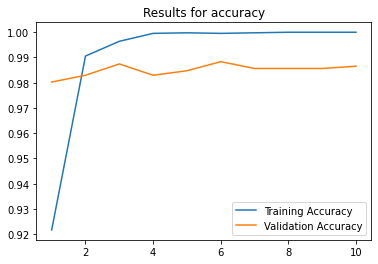

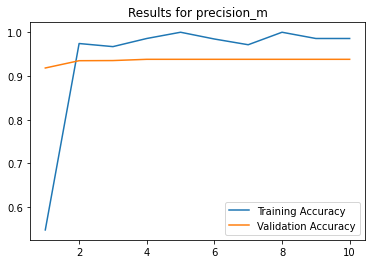

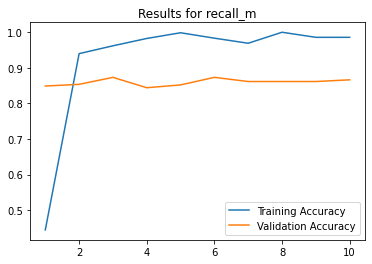

In [68]:
#plot the evaluation metrics by each epoch for the model to see if we are over or underfitting
import matplotlib.pyplot as plt
for i in ['accuracy', 'precision_m', 'recall_m']:
  acc = history.history[i]
  val_acc = history.history['val_{}'.format(i)]
  epochs = range(1, len(acc)+1)

  plt.figure()
  plt.plot(epochs, acc, label='Training Accuracy')
  plt.plot(epochs, val_acc, label = 'Validation Accuracy')
  plt.title('Results for {}'.format(i))
  plt.legend()
  plt.show()

You need to clean and tokenize your data for RNN prior to using it. What is a valid code snippet to do this? 
You are correct!

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

How would you characterize the vectors created by word2vec and doc2vec relative to the vectors created by TFIDF.
You are correct!
smaller and denser vectors

Why is a recurrent neural network more powerful than a simple neural network? 
You are correct!
It uses the output as input for a new layer.

How might you summarize the three components in a neural network? 
You are correct!
inputs, processes, and outputs

You want to use pad sequences to train your model. How do you construct a simple RNN model in code to use the pad sequences?
You are correct!

model.add(Embedding(len(tokenizer.index_word)+1, 32))

**Compare NLP techniques: Prep The Data for Modeling**
Read in and clean text

In [69]:
#read in and clean data
import nltk
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import string

stopwords = nltk.corpus.stopwords.words('english')

messages = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/NLP/main/spam.csv', encoding = "latin-1")
messages = messages.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
messages.columns = ['label', 'text']
messages['labels'] = np.where(messages['label']=='spam', 1,0)

def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [word for word in tokens if word not in stopwords]
  return text

messages['clean_text'] = messages['text'].apply(lambda x: clean_text(x))
messages.head()

,label,text,labels,clean_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0,"[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,0,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,ham,U dun say so early hor... U c already then say...,0,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",0,"[nah, dont, think, goes, usf, lives, around, though]"


In [70]:
#split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(messages['clean_text'],
                                                    messages['label'], test_size = 0.2)

In [71]:
#what do the first ten messages in the training set look like?
X_train[:]

397       [always, putting, business, put, pictures, ass, facebook, one, open, people, ive, ever, met, would, think, picture, room, would, hurt, make, feel, violated]
2061                                                                                                  [hey, want, crave, miss, need, love, ahmad, saeed, al, hallaq, ]
818                                                                                                                                                       [responding]
3757                                                                                                                        [lol, ouch, wish, id, stayed, bit, longer]
2858                                                                       [know, god, created, gap, fingers, one, made, comes, amp, fills, gaps, holding, hand, love]
                                                                                     ...                                                                             

In [72]:
#what do the labels look like?
y_train[:10]

397      ham
2061     ham
818      ham
3757     ham
2858     ham
3187    spam
1996     ham
1394     ham
4756     ham
1782     ham
Name: label, dtype: object

In [73]:
#lets save the training and test sets to ensure we are using the same data for each model
X_train.to_csv('X_train.csv', index=False, header=True)
X_test.to_csv('X_test.csv', index=False, header=True)
y_train.to_csv('y_train.csv', index=False, header=True)
y_test.to_csv('y_test.csv', index=False, header=True)



Compare NLP Techniques: Build Model on TF-IDF Vectors



Read In Cleaned Text

In [74]:
#load the cleaned training and test sets
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

X_train.to_csv('X_train.csv', index=False, header=True)
X_test.to_csv('X_test.csv', index=False, header=True)
y_train.to_csv('y_train.csv', index=False, header=True)
y_test.to_csv('y_test.csv', index=False, header=True)

X_train.head()


397     [always, putting, business, put, pictures, ass, facebook, one, open, people, ive, ever, met, would, think, picture, room, would, hurt, make, feel, violated]
2061                                                                                                [hey, want, crave, miss, need, love, ahmad, saeed, al, hallaq, ]
818                                                                                                                                                     [responding]
3757                                                                                                                      [lol, ouch, wish, id, stayed, bit, longer]
2858                                                                     [know, god, created, gap, fingers, one, made, comes, amp, fills, gaps, holding, hand, love]
Name: clean_text, dtype: object

# New Section

**Create TF-IDF Vectors**

In [75]:
#instantiate and fit a TFIDF vectorizer and then use that trained vectorizer to transform the messages in the training and test sets
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train['clean_text'])
X_train_vect = tfidf_vect.transform(X_train['clean_text'])
X_test_vect = tfidf_vect.transform(X_test['clean_text'])

KeyError: ignored

In [ ]:
#what words did the vectorizer learn?

In [ ]:
#how are these vectors stored?


In [ ]:
#can we convert the vectors to arrays?


Fit Random Forest Classifier On top of Vectors

In [ ]:
#Fit a basic Random Forest model on these vectors
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
